# 处理不是Nan的缺失值

In [1]:
import pandas as pd
# 加载
wis = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

In [4]:
import numpy as np
np.any(wis == '?') 

True

In [6]:
# 1. 把 '?' 替换为 np.nan
wis.replace(to_replace='?', value=np.nan, inplace=True)
# np.any(wis == '?') 
# 2. 在使用pandas处理nan缺失值的方法进行处理
wis.dropna(inplace=True)
# 按行删除缺失值
np.any(wis.isnull())

False

# 数据的离散化

In [7]:
# 读取股票数据
data = pd.read_csv('./data/stock_day.csv')
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [8]:
p_change = data.p_change

In [13]:
# 使用qcut进行数据离散化, q: 组数
qcut = pd.qcut(p_change, q=10)
# 统计每一个组的元素数量
qcut.value_counts()

(5.27, 10.03]                    65
(0.26, 0.94]                     65
(-0.462, 0.26]                   65
(-10.030999999999999, -4.836]    65
(2.938, 5.27]                    64
(1.738, 2.938]                   64
(-1.352, -0.462]                 64
(-2.444, -1.352]                 64
(-4.836, -2.444]                 64
(0.94, 1.738]                    63
Name: p_change, dtype: int64

In [20]:
# 指定区间的数据离散化
# 划分的区间
bins = [-100, -7, -3, 0, 3, 7, 100]
cut = pd.cut(p_change, bins=bins)
# 统计每一个区间元素个数
# p_count = cut.value_counts()
# cut

In [22]:
# one-hot(一热编码/哑变量)
dummies = pd.get_dummies(cut, prefix='rise')


In [24]:
dummies.head()

,"rise_(-100, -7]","rise_(-7, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 7]","rise_(7, 100]"
2018-02-27,0,0,0,1,0,0
2018-02-26,0,0,0,0,1,0
2018-02-23,0,0,0,1,0,0
2018-02-22,0,0,0,1,0,0
2018-02-14,0,0,0,1,0,0


# 数据合并

## 数据拼接(合并)

In [31]:
# 把one_hot编码后的内容和股票数据进行合并

new_data = pd.concat([data, dummies], axis=1)
# axis: 0 按列合并, 1 表示按行合并
new_data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,0,0,0,1,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,0,0,0,1,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,0,0,0,1,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,0,0,0,1,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,0,0,0,1,0,0
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77,0,0,0,1,0,0
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81,0,0,0,0,1,0
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36,0,1,0,0,0,0
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68,0,0,0,1,0,0
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35,0,0,1,0,0,0


## 数据连接

In [32]:
# 1.准备数据
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [33]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [34]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [35]:
# 内连接
pd.merge(left, right, how='inner', on=['key1', 'key2'])


,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [36]:
# 左(外)连接
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [37]:
# 右(外)链接
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [38]:
# 全外连接
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


# 交叉表与透视表

## 交叉表

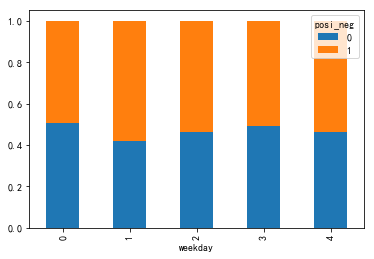

In [60]:
# 准备数据
# 1. 准备星期几数据
weekday = pd.to_datetime(data.index).weekday
data['weekday'] = weekday
# data
# 2. 准备是否涨的数据
data['posi_neg'] = np.where(data['p_change'] > 0, 1, 0)
# data
# 使用交叉表统计(分组统计数量)
crosstab = pd.crosstab(data.weekday, data.posi_neg)
# 先按第一个字段分组, 然后再案第二字段分组, 统计数量

# 计算比例
# 求和
s = crosstab.sum(axis=1)
# axis: 0 按列求和, 1 按行求和
# 计算比例
rs = crosstab.div(s, axis=0)

# 绘制柱状图
rs.plot(kind='bar', stacked=True)


## 使用pivot_table(透视表)实现

In [66]:
data.pivot_table(['posi_neg'], index='weekday')
# data.pivot_table(['posi_neg'], index='weekday', aggfunc='count')

,posi_neg
weekday,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


# 分组聚合

In [67]:
# 1. 准备数据
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})

In [68]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [70]:
col.groupby('color').mean()

,price1,price2
color,,
green,2.025,2.375
red,2.380,2.435
white,5.560,4.750


In [73]:
col.groupby('color')['price1'].mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [77]:
col['price1'].groupby(col['color']).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

## 星巴克门店案例

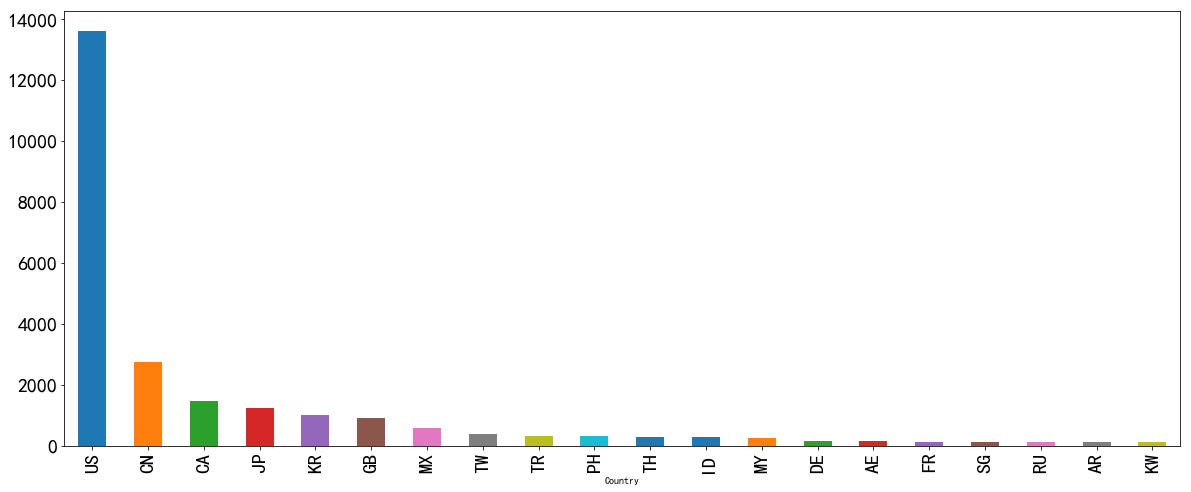

In [88]:
# 加载数据
startbucks = pd.read_csv('./data/starbucks/directory.csv')
# startbucks.head()
# 按国家对数据进行分组统计
country_counts = startbucks.groupby(['Country']).count()
# 绘图
country_counts['Brand'].sort_values(ascending=False)[:20].plot(kind='bar', figsize=(20, 8), fontsize=20)


In [91]:
# 按国家和省分组
startbucks.groupby(['Country', 'State/Province']).count()
# startbucks.head()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
        RK                  3             3           3               3   
        SH                  6             6           6               6   
        UQ                  1             1           1               1   
AR      B                  21            21          21              21   
        C                  73            73          73              73   
        M                   5             5           5               5   
        S                   3             3           3               3   
        X                   6             6           6               6   
AT      3                   1             1           1               1   
        5                   3             3           3               3   
        9                  14            14          14              14   
AU      NSW                 9             9           9               9   
        QLD                 8             8           8               8   
        VIC                 5             5           5               5   
AW      AW                  3             3           3               3   
AZ      BA                  3             3           3               3   
        SAB                 1             1           1               1   
BE      BE                  4             4           4               4   
        VAN                 1             1           1               1   
        VBR                 2             2           2               2   
        VLG                10            10          10              10   
        WAL                 2             2           2               2   
BG      2                   1             1           1               1   
        23                  4             4           4               4   
BH      13                 16            16          16              16   
...                       ...           ...         ...             ...   
US      MO                188           188         188             188   
        MS                 32            32          32              32   
        MT                 36            36          36              36   
        NC                338           338         338             338   
        ND                 13            13          13              13   
        NE                 58            58          58              58   
        NH                 29            29          29              29   
        NJ                261           261         261             261   
        NM                 76            76          76              76   
        NV                253           253         253             253   
        NY                645           645         645             645   
        OH                378           378         378             378   
        OK                 79            79          79              79   
        OR                359           359         359             359   
        PA                357           357         357             357   
        RI                 27            27          27              27   
        SC                131           131         131             131   
        SD                 25            25          25              25   
        TN                180           180         180             180   
        TX               1042          1042        1042            1042   
        UT                101           101      

# 综合案例

In [ ]:
# 现在我们有一组从2006年到2016年1000部最流行的电影数据，数据来源：https://www.kaggle.com/damianpanek/sunday-eda/data

# 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？
# 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？
# 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [92]:
# 导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# 1. 加载数据
movies = pd.read_csv('./data/IMDB-Movie-Data.csv')
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [110]:
# 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？
print('电影平均评分', movies['Rating'].mean())

# 导演的人数等信息
# 使用numpy进行去重, 获取一个去重后ndarray, 使用shape获取个数
print('导演人数', np.unique(movies['Director']).shape[0])
# movies.groupby('Director', as_index=False).count()['Director'].count()


电影平均评分 6.723199999999999
导演人数 644


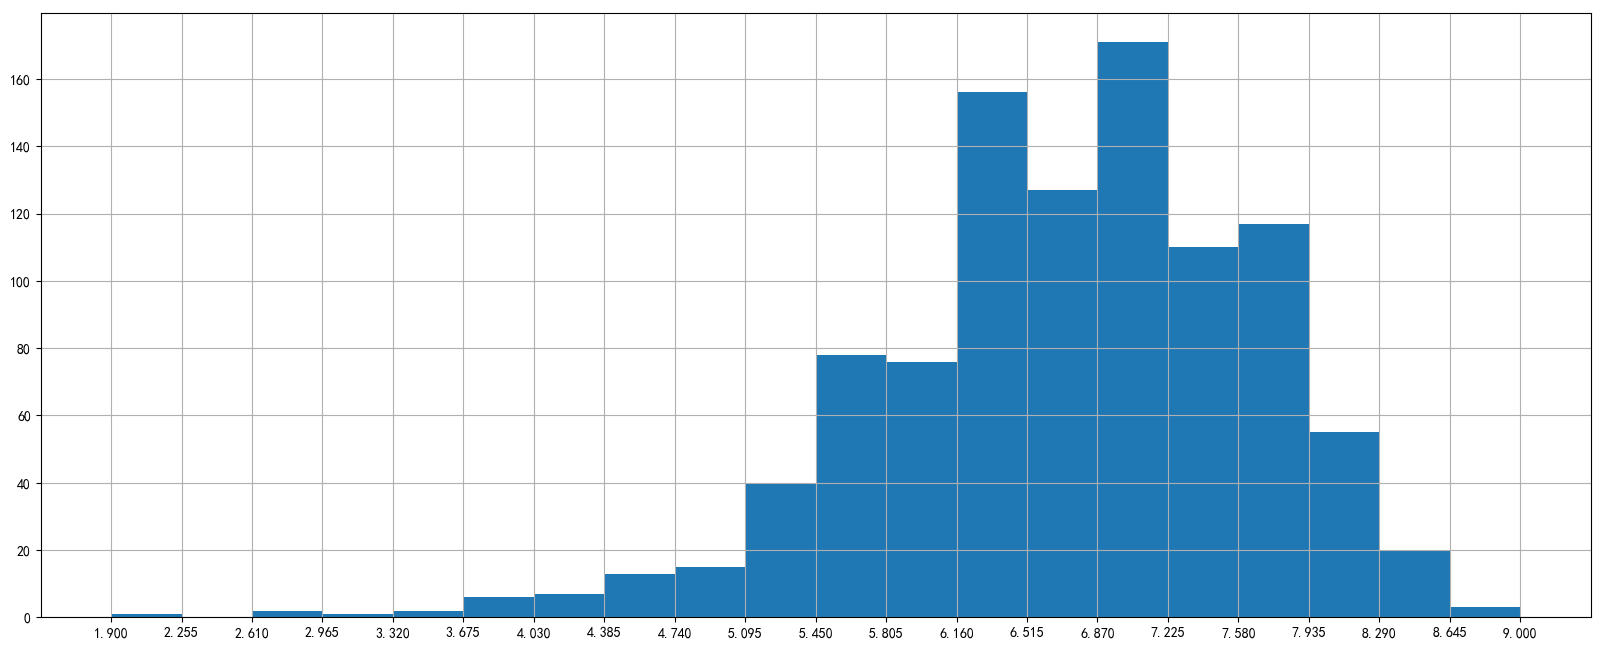

In [119]:
# 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？

# movies['Rating'].plot(kind='hist', figsize=(20, 8))
# 1. 创建画布
plt.figure(figsize=(20, 8), dpi=100)

rating = movies['Rating']
# 2. 绘图
plt.hist(rating, bins=20)

# 添加刻度
# 准备刻度数据
x_ticks = np.linspace(rating.min(), rating.max(), num=21)
plt.xticks(x_ticks)

# 添加网格
plt.grid()

# 3. 显示
plt.show()


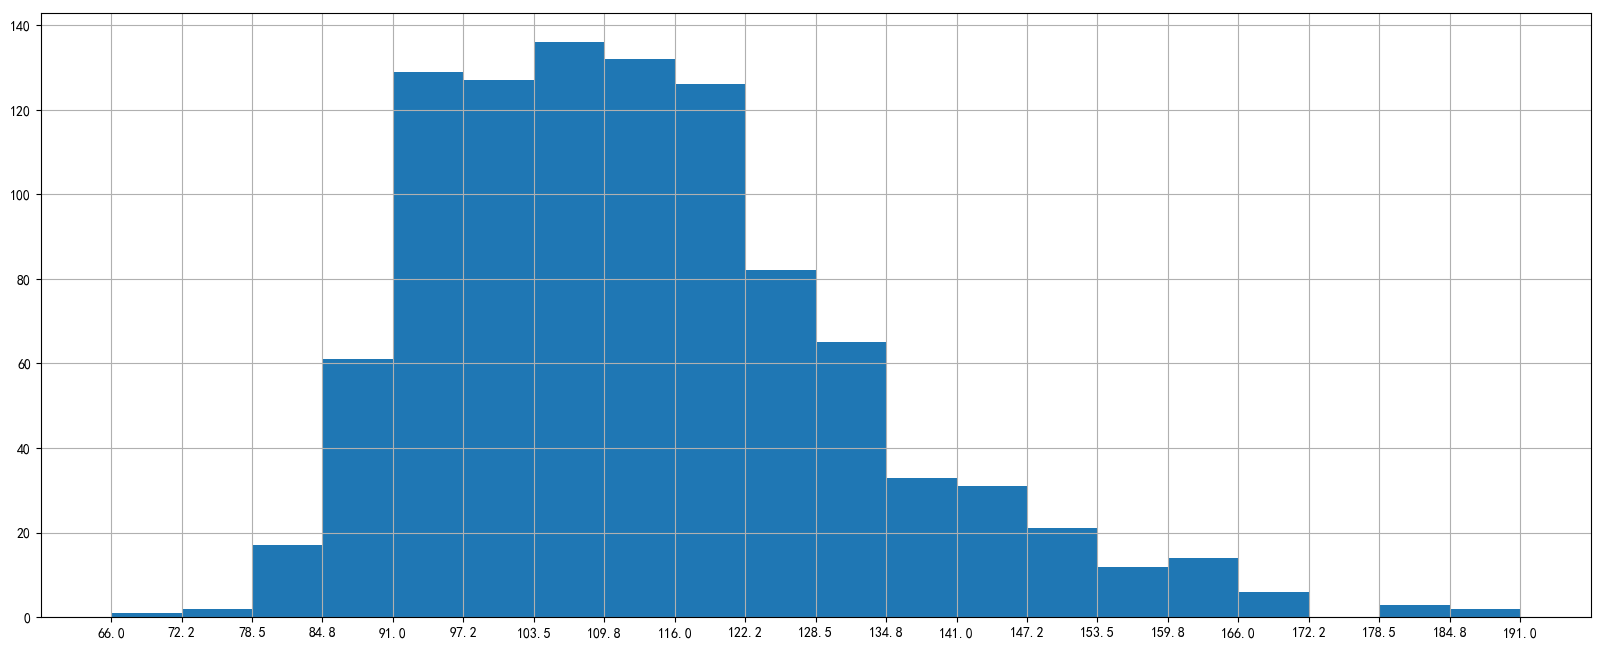

In [120]:
# 1. 创建画布
plt.figure(figsize=(20, 8), dpi=100)

runtime = movies['Runtime (Minutes)']
# 2. 绘图
plt.hist(runtime, bins=20)

# 添加刻度
# 准备刻度数据
x_ticks = np.linspace(runtime.min(), runtime.max(), num=21)
plt.xticks(x_ticks)

# 添加网格
plt.grid()

# 3. 显示
plt.show()


In [122]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [139]:
# 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？
# 1. 把所有类别信息添加一个列表中
# genres = []
# for genre in movies['Genre']:
#     #  print(genre)
#     #  genres += genre.split(',')
#     genres.extend(genre.split(','))
# genres
# 列表生成式
genres = [j for i in movies['Genre'] for j in i.split(',')]
# genres
genres = np.unique(genres)
# genres

# 2. 以电影索引为行, 类别为列生成全0数组
stats_data = np.zeros((movies.shape[0], genres.shape[0]))
# stats_data
# 创建DataFrame, 方便进行统计
stats_df = pd.DataFrame(stats_data, index=movies.index, columns=genres)
# stats_df
# 3. 如果电影是属于这个类别, 就标记为1
# 3.1 遍历所有电影
for i in movies.index:
    # 3.2 获取电影所属分类列表
    i_genres = movies.ix[i, 'Genre'].split(',')
    # 3.3 把属于这部电影的类别标记为1
    stats_df.ix[i, i_genres] = 1
    # stats_df.ix[i, ['Action','Adenture', 'Sci-Fi']] =1

# stats_df
# 4. 求和 
stats_df.sum().sort_values(ascending=False)


/Users/itheima/Envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/itheima/Envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Drama        513.0
Action       303.0
Comedy       279.0
Adventure    259.0
Thriller     195.0
Crime        150.0
Romance      141.0
Sci-Fi       120.0
Horror       119.0
Mystery      106.0
Fantasy      101.0
Biography     81.0
Family        51.0
Animation     49.0
History       29.0
Sport         18.0
Music         16.0
War           13.0
Western        7.0
Musical        5.0
dtype: float64